Accenture Dataset

## In this project we will Figure out the Top 5 performing categories using python and pandas. 

## Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

### Load Datasets

In [34]:
df1 = pd.read_csv('Content.csv')
df2 = pd.read_csv('Reactions.csv')
df3 = pd.read_csv('ReactionTypes.csv')

## Lets clean Content Table

In [35]:
df1

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


### Delete unnecessary colums

In [37]:
df1 = df1.drop(columns = ['URL','Unnamed: 0','User ID'])

### Rename Column :-

In [38]:
df1 = df1.rename(columns = {'Type' : 'Content Type'})
df1

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


### Replace Double quotes form Category column

In [39]:
df1['Category'] = df1['Category'].str.replace('"', '')
df1

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [40]:
# df1.to_csv('Content_clean.csv')

## Now clean Reactions Table

In [41]:
df2

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


### Drop Na Values

In [43]:
df2 = df2.dropna(how = 'any')

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22534 entries, 1 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22534 non-null  int64 
 1   Content ID  22534 non-null  object
 2   User ID     22534 non-null  object
 3   Type        22534 non-null  object
 4   Datetime    22534 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [45]:
# df2.to_csv('Reactions_clean.csv')

## Data Modelling : -

### Create a final data set by merging your three tables together

In [46]:
merge_df1_df2 = df1.merge(df2, on='Content ID')
merge_df1_df2

,Content ID,Content Type,Category,Unnamed: 0,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,3,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,25547,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,25548,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,25549,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,25551,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [47]:
# merge_df1_df2.to_csv('merge_df1_df2.csv', index=False)

#### Now merge all the tables

In [48]:
merge_all = merge_df1_df2.merge(df3, on= 'Type')
merge_all

,Content ID,Content Type,Category,Unnamed: 0_x,User ID,Type,Datetime,Unnamed: 0_y,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,2,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,2,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,35,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,2,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,52,8b49caad-bcc5-43de-bf40-34a66ff8805c,disgust,2021-03-28 21:15:26,2,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,88,ef147ea5-9696-44d5-b6c2-a43f62fd8ce2,disgust,2020-08-04 05:40:33,2,negative,0
...,...,...,...,...,...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,25489,d51a3403-8bab-4d88-af4f-a429c6d8c168,adore,2020-10-04 22:26:33,9,positive,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,25491,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,adore,2020-09-18 10:50:50,9,positive,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,25512,89572273-761e-46f3-8b99-1689d98aac90,adore,2020-10-31 03:58:44,9,positive,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,25524,7bf3ce80-784e-42a0-b06a-dbbd1e31a9b7,adore,2020-06-25 15:12:29,9,positive,72


In [49]:
merge_all.isna().sum()

Content ID      0
Content Type    0
Category        0
Unnamed: 0_x    0
User ID         0
Type            0
Datetime        0
Unnamed: 0_y    0
Sentiment       0
Score           0
dtype: int64

In [50]:
# merge_all.to_csv('merge_all.csv', index=False)

## Figure out the Top 5 performing categories

In [51]:
merge_all = pd.read_csv('merge_all.csv', parse_dates=['Datetime'])

In [52]:
merge_all['Category'] = merge_all['Category'].str.lower()

In [53]:
top_Category = merge_all.groupby('Category').agg(
    count = ('Score','sum')
)

In [54]:
top_Category = top_Category.reset_index()
top_Category = top_Category.rename(columns={'count' : 'Sum'})
top_Category = top_Category.sort_values(by='Sum',ascending=False)

In [55]:
top_Category.head(5)

,Category,Sum
0,animals,68624
9,science,65405
7,healthy eating,63138
12,technology,63035
6,food,61598


In [56]:
ndf = pd.DataFrame(top_Category.head(5))
ndf

,Category,Sum
0,animals,68624
9,science,65405
7,healthy eating,63138
12,technology,63035
6,food,61598


In [57]:
# top_Category.to_csv('top_5_Category.csv')

##  Pie chart :- top 5 content categories 

([<matplotlib.patches.Wedge at 0x900e508d90>,
 [Text(0.8622406359539376, 0.6830381290306928, 'animals'),
  Text(-0.43606426762621825, 1.0098752172915275, 'science'),
  Text(-1.0953754251869579, -0.1007604976987087, 'healthy eating'),
  Text(-0.26926090894604465, -1.066535776668345, 'technology'),
  Text(0.907027111696733, -0.6223357764479578, 'food')],
 [Text(0.4703130741566932, 0.37256625219855966, '21.3%'),
  Text(-0.2378532368870281, 0.5508410276135605, '20.3%'),
  Text(-0.5974775046474314, -0.054960271472022926, '19.6%'),
  Text(-0.14686958669784253, -0.5817467872736427, '19.6%'),
  Text(0.49474206092549067, -0.33945587806252236, '19.1%')])

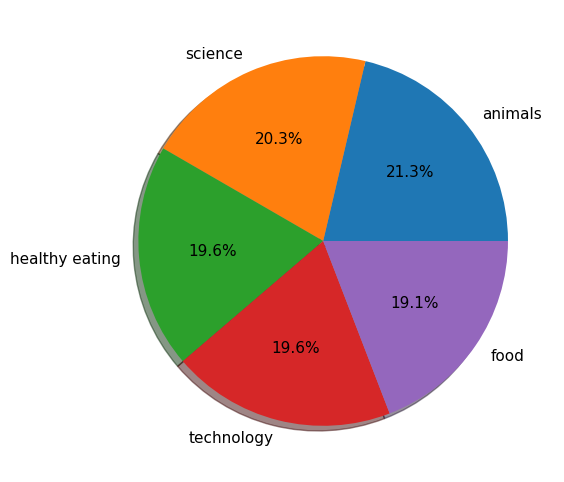

In [58]:
plt.figure(figsize=(8,6))
plt.pie(x=ndf['Sum'], labels=ndf['Category'], autopct='%.1f%%', shadow = True, textprops={'fontsize' : 11})

### How many unique categories are there?

In [74]:
unique_categories_count = merge_all['Category'].nunique()
print(f"There are {unique_categories_count} unique categories in the dataset.")

There are 16 unique categories in the dataset.


### How many reactions are there to the most popular category?

In [60]:
top_reaction = merge_all['Category'].value_counts()
top_reaction = top_reaction.reset_index()
top_reaction = top_reaction.sort_values(by='count', ascending=False)
top_reaction.head(5)

,Category,count
0,animals,1738
1,science,1646
2,healthy eating,1572
3,technology,1557
4,food,1556


In [61]:
merge_all.dtypes

Content ID              object
Content Type            object
Category                object
Unnamed: 0_x             int64
User ID                 object
Type                    object
Datetime        datetime64[ns]
Unnamed: 0_y             int64
Sentiment               object
Score                    int64
datetime                object
dtype: object

### What was the month with the most posts

In [62]:
merge_all = merge_all.drop(columns = 'datetime')   # drop duplicate datetime column
merge_all

,Content ID,Content Type,Category,Unnamed: 0_x,User ID,Type,Datetime,Unnamed: 0_y,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,1,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,2,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,4,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,2,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,35,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,2,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,52,8b49caad-bcc5-43de-bf40-34a66ff8805c,disgust,2021-03-28 21:15:26,2,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,88,ef147ea5-9696-44d5-b6c2-a43f62fd8ce2,disgust,2020-08-04 05:40:33,2,negative,0
...,...,...,...,...,...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,25489,d51a3403-8bab-4d88-af4f-a429c6d8c168,adore,2020-10-04 22:26:33,9,positive,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,25491,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,adore,2020-09-18 10:50:50,9,positive,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,25512,89572273-761e-46f3-8b99-1689d98aac90,adore,2020-10-31 03:58:44,9,positive,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,25524,7bf3ce80-784e-42a0-b06a-dbbd1e31a9b7,adore,2020-06-25 15:12:29,9,positive,72


### take out month from datetime column

In [65]:
merge_all['Month'] = merge_all['Datetime'].dt.month_name()
merge_all

,Content ID,Content Type,Category,Unnamed: 0_x,User ID,Type,Datetime,Unnamed: 0_y,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,1,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,2,negative,0,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,4,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,2,negative,0,January
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,35,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,2,negative,0,April
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,52,8b49caad-bcc5-43de-bf40-34a66ff8805c,disgust,2021-03-28 21:15:26,2,negative,0,March
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,88,ef147ea5-9696-44d5-b6c2-a43f62fd8ce2,disgust,2020-08-04 05:40:33,2,negative,0,August
...,...,...,...,...,...,...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,25489,d51a3403-8bab-4d88-af4f-a429c6d8c168,adore,2020-10-04 22:26:33,9,positive,72,October
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,25491,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,adore,2020-09-18 10:50:50,9,positive,72,September
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,25512,89572273-761e-46f3-8b99-1689d98aac90,adore,2020-10-31 03:58:44,9,positive,72,October
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,25524,7bf3ce80-784e-42a0-b06a-dbbd1e31a9b7,adore,2020-06-25 15:12:29,9,positive,72,June


In [72]:
post_per_month = merge_all['Month'].value_counts()
most_posts_month = post_per_month.idxmax()

In [73]:
print(f"The month with the most posts is month {post_per_month}.")

The month with the most posts is month May.
